In [81]:
# Import the SQL ALchemy engine
from sqlalchemy import create_engine

# Database credentials
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'baseball'

# use the credentials to start a connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

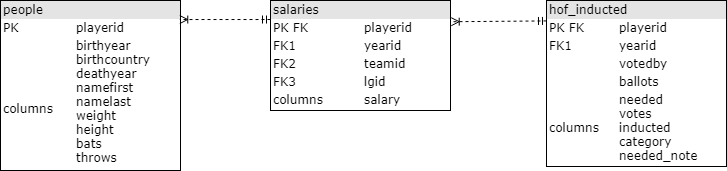

In [82]:
# question1
from IPython.display import Image
Image(filename='Untitled Diagram (1).png')

# what is the key different between PK and FK
# how to tell which is parent or children


In [84]:
# question2
sql = '''
    select namefirst, namelast, inducted
    from people left outer join hof_inducted
    on people.playerid = hof_inducted.playerid
'''

results = engine.execute(sql)
rows = results.fetchall()
rows[:10]

[('David', 'Aardsma', None),
 ('Hank', 'Aaron', 'Y'),
 ('Tommie', 'Aaron', None),
 ('Don', 'Aase', None),
 ('Andy', 'Abad', None),
 ('Fernando', 'Abad', None),
 ('John', 'Abadie', None),
 ('Ed', 'Abbaticchio', None),
 ('Bert', 'Abbey', None),
 ('Charlie', 'Abbey', None)]

In [85]:
# question3
sql = '''
    select namefirst, namelast, birthyear, deathyear, birthcountry
    from people left outer join hof_inducted 
    on people.playerid = hof_inducted.playerid
    where yearid=2006 
    and votedby = 'Negro League'
    and inducted = 'Y'
'''
results = engine.execute(sql)
rows = results.fetchall()
rows

[('Ray', 'Brown', 1908, 1965, 'USA'),
 ('Willard', 'Brown', 1915, 1996, 'USA'),
 ('Andy', 'Cooper', 1898, 1941, 'USA'),
 ('Frank', 'Grant', 1865, 1937, 'USA'),
 ('Pete', 'Hill', 1882, 1951, 'USA'),
 ('Biz', 'Mackey', 1897, 1965, 'USA'),
 ('Effa', 'Manley', 1897, 1981, 'USA'),
 ('Jose', 'Mendez', 1885, 1928, 'Cuba'),
 ('Alex', 'Pompez', 1890, 1974, 'USA'),
 ('Cum', 'Posey', 1890, 1946, 'USA'),
 ('Louis', 'Santop', 1889, 1942, 'USA'),
 ('Mule', 'Suttles', 1901, 1966, 'USA'),
 ('Ben', 'Taylor', 1888, 1953, 'USA'),
 ('Cristobal', 'Torriente', 1893, 1938, 'Cuba'),
 ('Sol', 'White', 1868, 1955, 'USA'),
 ('J. L.', 'Wilkinson', 1878, 1964, 'USA'),
 ('Jud', 'Wilson', 1896, 1963, 'USA')]

In [22]:
# question4
sql = '''
    select salaries.yearid, salaries.playerid, teamid, salary, category
    from salaries join hof_inducted
    on salaries.playerid = hof_inducted.playerid
'''
results = engine.execute(sql)
rows = results.fetchall()
rows[:10]



[(1985, 'suttebr01', 'ATL', 1354167, 'Player'),
 (1985, 'murraed02', 'BAL', 1472819, 'Player'),
 (1985, 'ripkeca01', 'BAL', 800000, 'Player'),
 (1985, 'boggswa01', 'BOS', 1000000, 'Player'),
 (1985, 'riceji01', 'BOS', 779227, 'Player'),
 (1985, 'carewro01', 'CAL', 875000, 'Player'),
 (1985, 'jacksre01', 'CAL', 1058894, 'Player'),
 (1985, 'suttodo01', 'CAL', 750000, 'Player'),
 (1985, 'fiskca01', 'CHA', 685000, 'Player'),
 (1985, 'seaveto01', 'CHA', 1136262, 'Player')]

In [86]:
# question5
sql='''
    select salaries.playerid, salaries.yearid, teamid, lgid, salary, inducted
    from salaries full outer join hof_inducted
    on salaries.playerid = hof_inducted.playerid
'''

results = engine.execute(sql)
rows = results.fetchall()
rows[:10]

[('barkele01', 1985, 'ATL', 'NL', 870000, None),
 ('bedrost01', 1985, 'ATL', 'NL', 550000, None),
 ('benedbr01', 1985, 'ATL', 'NL', 545000, None),
 ('campri01', 1985, 'ATL', 'NL', 633333, None),
 ('ceronri01', 1985, 'ATL', 'NL', 625000, None),
 ('chambch01', 1985, 'ATL', 'NL', 800000, None),
 ('dedmoje01', 1985, 'ATL', 'NL', 150000, None),
 ('forstte01', 1985, 'ATL', 'NL', 483333, None),
 ('garbege01', 1985, 'ATL', 'NL', 772000, None),
 ('harpete01', 1985, 'ATL', 'NL', 250000, None)]

In [31]:
# question6
sql = '''
    select * from hof_inducted
    union
    select * from hof_not_inducted;
'''
results = engine.execute(sql)
row = results.fetchall()
playerid = [x['playerid'] for x in rows]
playerid[:10]

['suttebr01',
 'murraed02',
 'ripkeca01',
 'boggswa01',
 'riceji01',
 'carewro01',
 'jacksre01',
 'suttodo01',
 'fiskca01',
 'seaveto01']

In [87]:
# question7
sql = '''
    select people.namefirst, people.namelast, sum(salary)
    from salaries left outer join people
    on people.playerid = salaries.playerid
    group by namelast, namefirst
    order by namelast, namefirst
    
'''

results = engine.execute(sql)
rows = results.fetchall()
rows[:10]

[('David', 'Aardsma', 9259750),
 ('Don', 'Aase', 2300000),
 ('Andy', 'Abad', 327000),
 ('Fernando', 'Abad', 3766400),
 ('Jeff', 'Abbott', 985000),
 ('Jim', 'Abbott', 12960500),
 ('Kurt', 'Abbott', 4237000),
 ('Kyle', 'Abbott', 259000),
 ('Paul', 'Abbott', 6471000),
 ('Reggie', 'Abercrombie', 327000)]

In [35]:
# questions8

sql = '''
    SELECT hof_inducted.playerid, yearid, namefirst, namelast 
    FROM hof_inducted LEFT OUTER JOIN people
    ON hof_inducted.playerid = people.playerid
    
    union all
    
    select hof_not_inducted.playerid, yearid, namefirst, namelast
    from hof_not_inducted left join people
    on hof_not_inducted.playerid = people.playerid
'''
results =  engine.execute(sql)
rows = results.fetchall()
rows[:10]



[('aaronha01', 1982, 'Hank', 'Aaron'),
 ('alexape01', 1938, 'Pete', 'Alexander'),
 ('alomaro01', 2011, 'Roberto', 'Alomar'),
 ('alstowa01', 1983, 'Walter', 'Alston'),
 ('andersp01', 2000, 'Sparky', 'Anderson'),
 ('ansonca01', 1939, 'Cap', 'Anson'),
 ('aparilu01', 1984, 'Luis', 'Aparicio'),
 ('applilu01', 1964, 'Luke', 'Appling'),
 ('ashburi01', 1995, 'Richie', 'Ashburn'),
 ('averiea01', 1975, 'Earl', 'Averill')]

In [91]:
# question9
sql = '''
    select yearid, inducted, concat(namefirst, ', ', namelast) as namefull 
    from hof_inducted left join people
    on hof_inducted.playerid = people.playerid
    WHERE yearid >= 1980
    
    union all
    
    select yearid, inducted, concat(namefirst, ', ', namelast) as namefull
    from hof_not_inducted left join people
    on hof_not_inducted.playerid = people.playerid
    WHERE yearid >= 1980
    
    order by yearid, inducted DESC, namefull
'''

results =  engine.execute(sql)
rows = results.fetchall()
rows[:10]


[(1980, 'Y', 'Al, Kaline'),
 (1980, 'Y', 'Chuck, Klein'),
 (1980, 'Y', 'Duke, Snider'),
 (1980, 'Y', 'Tom, Yawkey'),
 (1980, 'N', 'Al, Dark'),
 (1980, 'N', 'Andy, Kosco'),
 (1980, 'N', 'Bill, Mazeroski'),
 (1980, 'N', 'Bob, Barton'),
 (1980, 'N', 'Bob, Miller'),
 (1980, 'N', 'Bob, Veale')]

In [48]:
#question10
sql = '''
    select yearid, teamid, salaries.playerid, namefirst, namelast, salary
    from salaries left join people
    on salaries.playerid = people.playerid
    
    where salary in (select max(salary) from salaries
                    group by yearid, teamid)
    
    order by salary desc 
'''
results =  engine.execute(sql)
rows = results.fetchall()
rows[:10]

[(2010, 'NYA', 'rodrial01', 'Alex', 'Rodriguez', 33000000),
 (2016, 'LAN', 'kershcl01', 'Clayton', 'Kershaw', 33000000),
 (2009, 'NYA', 'rodrial01', 'Alex', 'Rodriguez', 33000000),
 (2015, 'LAN', 'kershcl01', 'Clayton', 'Kershaw', 32571000),
 (2011, 'NYA', 'rodrial01', 'Alex', 'Rodriguez', 32000000),
 (2016, 'ARI', 'greinza01', 'Zack', 'Greinke', 31799030),
 (2012, 'NYA', 'rodrial01', 'Alex', 'Rodriguez', 30000000),
 (2016, 'BOS', 'priceda01', 'David', 'Price', 30000000),
 (2013, 'NYA', 'rodrial01', 'Alex', 'Rodriguez', 29000000),
 (2016, 'DET', 'verlaju01', 'Justin', 'Verlander', 28000000)]

In [92]:
# question11
sql= '''
    select birthyear, deathyear, namefirst, namelast
    from people
    where birthyear > any(select birthyear from people 
                        where playerid = 'ruthba01')
    order by birthyear asc
'''
results =  engine.execute(sql)
rows = results.fetchall()
rows[:10]


[(1896, 1978, 'Mike', 'Wilson'),
 (1896, 1983, 'Chick', 'Sorrells'),
 (1896, 1963, 'Merito', 'Acosta'),
 (1896, 1962, 'Mutt', 'Wilson'),
 (1896, 1950, 'Dick', 'McCabe'),
 (1896, 1969, 'Roy', 'Wilson'),
 (1896, 1969, 'Ray', 'Schmandt'),
 (1896, 1972, 'Rip', 'Conway'),
 (1896, 1968, 'Bill', 'Sherdel'),
 (1896, 1971, 'Sam', 'Post')]

In [63]:
# question12
sql = '''
    select namefirst, namelast,
        case
            when birthcountry = 'USA' then 'USA'
            when birthcountry != 'USA' then 'non-USA'
        end as usaborn
    from people
    order by 3
'''
results =  engine.execute(sql)
rows = results.fetchall()
rows[:10]


[('Brayan', 'Pena', 'non-USA'),
 ('Carlos', 'Pena', 'non-USA'),
 ('Elvis', 'Pena', 'non-USA'),
 ('Felix', 'Pena', 'non-USA'),
 ('Francisco', 'Pena', 'non-USA'),
 ('Geronimo', 'Pena', 'non-USA'),
 ('Hipolito', 'Pena', 'non-USA'),
 ('Jesus', 'Pena', 'non-USA'),
 ('Michael', 'Campbell', 'non-USA'),
 ('Jose', 'Pena', 'non-USA')]

In [67]:
# question13
sql = '''
    select
        avg(case when throws = 'R' then height end) as right_hight,
        avg(case when throws = 'L' then height end)as left_hight
    from people
'''
results =  engine.execute(sql)
rows = results.fetchall()
rows[:10]




[(Decimal('72.3172024506092104'), Decimal('72.5530219780219780'))]

In [75]:
# question14_1
sql = '''
    select avg(salary)
    from salaries
    where salary in (select max(salary) from salaries 
                    where yearid>2010 
                    group by teamid)
'''
results =  engine.execute(sql)
rows = results.fetchall()
rows

[(Decimal('15927004.096952908587'),)]

In [76]:
# question14_2
sql = '''WITH max_team_sal AS
(
SELECT teamid, MAX(salary) as max_sal
FROM salaries
WHERE yearid > 2010
GROUP BY teamid
)
SELECT AVG(max_sal) AS avg_max_sal
FROM max_team_sal;'''

results =  engine.execute(sql)
rows = results.fetchall()
rows

[(Decimal('21746725.129032258065'),)]

In [ ]:
# why question14 give different result with two methods